# Simulating a simple linear SISO system

Mikhail Pak, 2017

In [1]:
import control
import controlboros
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import cont2discrete

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In this notebook, we shall simulate the step response of a simple system using `python-control` and `controlboros`.

The system is defined by the following transfer function:

$$H(s) = \frac{1}{s^2 + 0.5 s + 1}$$

We want to simulate from 0 to 10 seconds:

In [2]:
t_begin, t_end = 0.0, 10.0

We use 0.1 ms sample time for the reference simulation performed with `python-control`:

In [3]:
dt_ref = 1.0e-4

As for `controlboros`, it should use 200 ms sample time to highlight the difference: 

In [4]:
dt_cb = 2.0e-1

Ok. Now we create a reference system using `python-control` and compute its step response:

In [5]:
tf_ref = control.tf2ss(control.tf([1.0], [1.0, 0.5, 1.0]))

t_ref, y_ref = control.step_response(tf_ref, T=np.arange(t_begin, t_end, dt_ref))

Since `controlboros` supports only discrete-time simulations, we convert our system into discrete-time using `cont2discrete` from `scipy.signal`.

Notice that it uses the zero-order hold method per default. You can play around and see the difference e.g. when using the Tustin's approximation (`method="bilinear"`).

In [6]:
A_d, B_d, C_d, D_d, _ = cont2discrete((tf_ref.A, tf_ref.B, tf_ref.C, tf_ref.D), dt_cb)

Now we create a `controlboros.StateSpace` model and initialise arrays for the step response:

In [7]:
sys_cb = controlboros.StateSpace(A_d, B_d, C_d, D_d)

t_cb = np.arange(t_begin, t_end, dt_cb)
y_cb = np.zeros((len(t_cb),))

We're ready to run the main loop:

In [8]:
for i in range(len(t_cb)):
    y_cb[i] = sys_cb.push_stateful([1.0])

Plot and compare results:

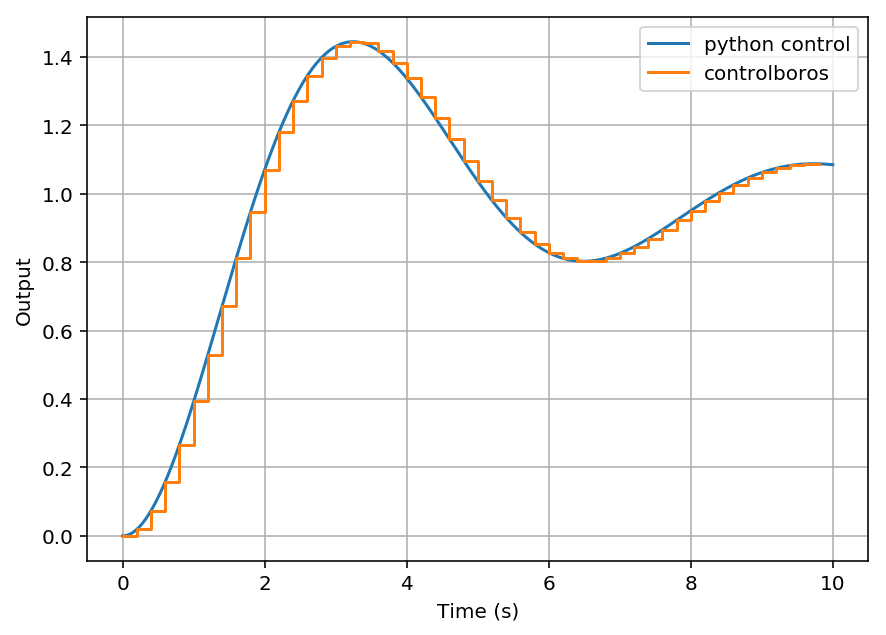

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(t_ref, y_ref)
plt.step(t_cb, y_cb, where="post")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend(["python control", "controlboros"])
plt.grid()
plt.show()